# CUSTOMER CHURN PREDICTION


# Importing libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt
%matplotlib inline


# load Data

In [2]:
dataset=pd.read_csv('Churn-Data.csv')


In [3]:
dataset.head()

cID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  4223-BKEOR  Female              0      No        Yes      21          Yes   
1  6035-RIIOM  Female              0      No         No      54          Yes   
2  3797-VTIDR    Male              0     Yes         No       1           No   
3  2568-BRGYX    Male              0      No         No       4          Yes   
4  2775-SEFEE    Male              0      No        Yes       0          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0                No             DSL            Yes  ...              Yes   
1               Yes     Fiber optic             No  ...               No   
2  No phone service             DSL             No  ...               No   
3                No     Fiber optic             No  ...               No   
4               Yes             DSL            Yes  ...               No   

  TechSupport TV_Streaming Movie_Streaming        Contract PaperlessBilling  \
0          No           No             Yes        One year               No   
1          No          Yes             Yes        Two year              Yes   
2          No           No              No  Month-to-month              Yes   
3          No           No              No  Month-to-month              Yes   
4         Yes           No              No        Two year              Yes   

              Method_Payment Charges_Month  TotalCharges Churn  
0               Mailed check         64.85        1336.8    No  
1  Bank transfer (automatic)         97.20       5129.45    No  
2           Electronic check         23.45         23.45   Yes  
3           Electronic check         70.20        237.95   Yes  
4  Bank transfer (automatic)         61.90                  No  

[5 rows x 21 columns]

In [4]:
dataset.shape

(5634, 21)

In [5]:
dataset.columns.values

array(['cID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'TV_Streaming', 'Movie_Streaming', 'Contract',
       'PaperlessBilling', 'Method_Payment', 'Charges_Month',
       'TotalCharges', 'Churn'], dtype=object)

In [6]:
dataset.dtypes

cID                  object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
TV_Streaming         object
Movie_Streaming      object
Contract             object
PaperlessBilling     object
Method_Payment       object
Charges_Month       float64
TotalCharges         object
Churn                object
dtype: object

In [7]:
dataset.describe()

SeniorCitizen       tenure  Charges_Month
count    5634.000000  5634.000000    5634.000000
mean        0.160809    32.373092      64.864253
std         0.367388    24.424539      30.089324
min         0.000000     0.000000      18.250000
25%         0.000000     9.000000      35.750000
50%         0.000000    29.000000      70.525000
75%         0.000000    55.000000      89.937500
max         1.000000    72.000000     118.600000

Text(0.5, 1.02, 'Count of Target Variable per category')

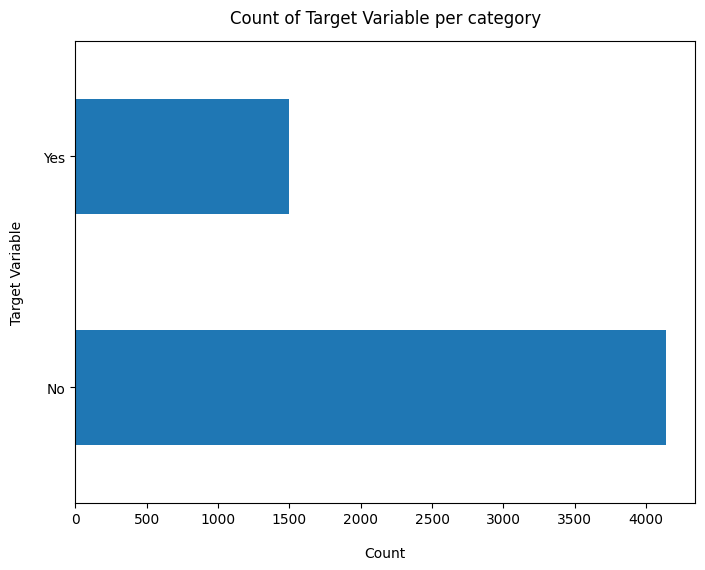

In [8]:
dataset['Churn'].value_counts().plot(kind='barh',figsize=(8,6))
plt.xlabel("Count",labelpad=14)
plt.ylabel("Target Variable",labelpad=14)
plt.title("Count of Target Variable per category",y=1.02)

In [9]:
100*dataset['Churn'].value_counts()/len(dataset['Churn'])

Churn
No     73.446929
Yes    26.553071
Name: count, dtype: float64

In [10]:
dataset['Churn'].value_counts()

Churn
No     4138
Yes    1496
Name: count, dtype: int64

In [11]:
dataset.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5634 entries, 0 to 5633
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cID               5634 non-null   object 
 1   gender            5634 non-null   object 
 2   SeniorCitizen     5634 non-null   int64  
 3   Partner           5634 non-null   object 
 4   Dependents        5634 non-null   object 
 5   tenure            5634 non-null   int64  
 6   PhoneService      5634 non-null   object 
 7   MultipleLines     5634 non-null   object 
 8   InternetService   5634 non-null   object 
 9   OnlineSecurity    5634 non-null   object 
 10  OnlineBackup      5634 non-null   object 
 11  DeviceProtection  5634 non-null   object 
 12  TechSupport       5634 non-null   object 
 13  TV_Streaming      5634 non-null   object 
 14  Movie_Streaming   5634 non-null   object 
 15  Contract          5634 non-null   object 
 16  PaperlessBilling  5634 non-null   object 


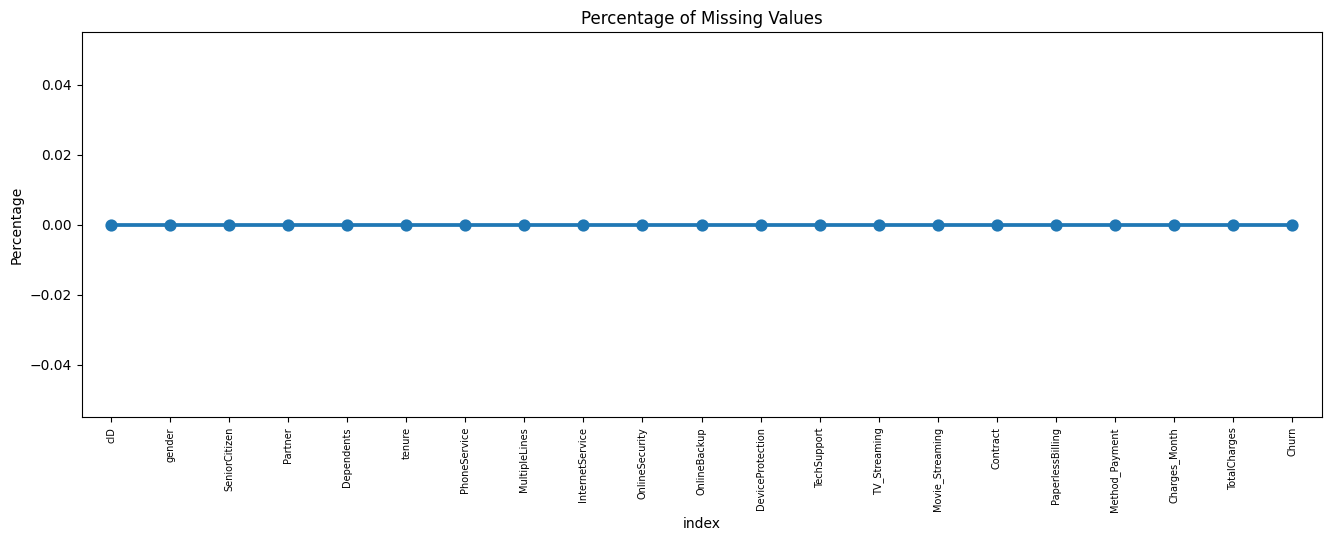

In [12]:
missing = pd.DataFrame((dataset.isnull().sum())*100/dataset.shape[0]).reset_index()
missing.columns = ['index', 'Missing Percentage']  # Rename columns for clarity

plt.figure(figsize=(16,5))
ax = sns.pointplot(x='index', y='Missing Percentage', data=missing)  # Use correct column names

plt.xticks(rotation=90,fontsize=7)
plt.title("Percentage of Missing Values")
plt.ylabel("Percentage")
plt.show()

# data cleaning

In [13]:
teleco_data=dataset.copy()

In [14]:
teleco_data.TotalCharges = pd.to_numeric(teleco_data.TotalCharges, errors='coerce')
teleco_data.isnull().sum()

cID                  0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
TV_Streaming         0
Movie_Streaming      0
Contract             0
PaperlessBilling     0
Method_Payment       0
Charges_Month        0
TotalCharges        10
Churn                0
dtype: int64

In [15]:
teleco_data.loc[teleco_data ['TotalCharges'].isnull() == True]

cID  gender  SeniorCitizen Partner Dependents  tenure  \
4     2775-SEFEE    Male              0      No        Yes       0   
282   1371-DWPAZ  Female              0     Yes        Yes       0   
2419  3213-VVOLG    Male              0     Yes        Yes       0   
2734  2923-ARZLG    Male              0     Yes        Yes       0   
2903  7644-OMVMY    Male              0     Yes        Yes       0   
3974  5709-LVOEQ  Female              0     Yes        Yes       0   
5023  3115-CZMZD    Male              0      No        Yes       0   
5030  2520-SGTTA  Female              0     Yes        Yes       0   
5343  4472-LVYGI  Female              0     Yes        Yes       0   
5599  4367-NUYAO    Male              0     Yes        Yes       0   

     PhoneService     MultipleLines InternetService       OnlineSecurity  ...  \
4             Yes               Yes             DSL                  Yes  ...   
282            No  No phone service             DSL                  Yes  ...   
2419          Yes               Yes              No  No internet service  ...   
2734          Yes                No              No  No internet service  ...   
2903          Yes                No              No  No internet service  ...   
3974          Yes                No             DSL                  Yes  ...   
5023          Yes                No              No  No internet service  ...   
5030          Yes                No              No  No internet service  ...   
5343           No  No phone service             DSL                  Yes  ...   
5599          Yes               Yes              No  No internet service  ...   

         DeviceProtection          TechSupport         TV_Streaming  \
4                      No                  Yes                   No   
282                   Yes                  Yes                  Yes   
2419  No internet service  No internet service  No internet service   
2734  No internet service  No internet service  No internet service   
2903  No internet service  No internet service  No internet service   
3974                  Yes                   No                  Yes   
5023  No internet service  No internet service  No internet service   
5030  No internet service  No internet service  No internet service   
5343                  Yes                  Yes                  Yes   
5599  No internet service  No internet service  No internet service   

          Movie_Streaming  Contract PaperlessBilling  \
4                      No  Two year              Yes   
282                    No  Two year               No   
2419  No internet service  Two year               No   
2734  No internet service  One year              Yes   
2903  No internet service  Two year               No   
3974                  Yes  Two year               No   
5023  No internet service  Two year               No   
5030  No internet service  Two year               No   
5343                   No  Two year              Yes   
5599  No internet service  Two year               No   

                 Method_Payment Charges_Month  TotalCharges  Churn  
4     Bank transfer (automatic)         61.90           NaN     No  
282     Credit card (automatic)         56.05           NaN     No  
2419               Mailed check         25.35           NaN     No  
2734               Mailed check         19.70           NaN     No  
2903               Mailed check         19.85           NaN     No  
3974               Mailed check         80.85           NaN     No  
5023               Mailed check         20.25           NaN     No  
5030               Mailed check         20.00           NaN     No  
5343  Bank transfer (automatic)         52.55           NaN     No  
5599               Mailed check         25.75           NaN     No  

[10 rows x 21 columns]

In [16]:
#Removing missing values 
teleco_data.dropna(how = 'any', inplace = True)

#teleco_data.fillna(0)

In [17]:
# Get the max tenure
print(teleco_data['tenure'].max()) #72

72


In [18]:
# Group the tenure in bins of 12 months
labels = ["{0} - {1}".format(i, i + 11) for i in range(1, 72, 12)]

teleco_data['tenure_group'] = pd.cut(teleco_data.tenure, range(1, 80, 12), right=False, labels=labels)

In [19]:
teleco_data['tenure_group'].value_counts()

tenure_group
1 - 12     1730
61 - 72    1110
13 - 24     815
25 - 36     681
49 - 60     662
37 - 48     626
Name: count, dtype: int64

In [20]:
#drop column customerID and tenure
teleco_data.drop(columns= ['cID','tenure'], axis=1, inplace=True)
teleco_data.head()

gender  SeniorCitizen Partner Dependents PhoneService     MultipleLines  \
0  Female              0      No        Yes          Yes                No   
1  Female              0      No         No          Yes               Yes   
2    Male              0     Yes         No           No  No phone service   
3    Male              0      No         No          Yes                No   
5    Male              0      No         No          Yes                No   

  InternetService OnlineSecurity OnlineBackup DeviceProtection TechSupport  \
0             DSL            Yes           No              Yes          No   
1     Fiber optic             No          Yes               No          No   
2             DSL             No           No               No          No   
3     Fiber optic             No           No               No          No   
5     Fiber optic             No           No               No          No   

  TV_Streaming Movie_Streaming        Contract PaperlessBilling  \
0           No             Yes        One year               No   
1          Yes             Yes        Two year              Yes   
2           No              No  Month-to-month              Yes   
3           No              No  Month-to-month              Yes   
5           No              No  Month-to-month              Yes   

              Method_Payment  Charges_Month  TotalCharges Churn tenure_group  
0               Mailed check          64.85       1336.80    No      13 - 24  
1  Bank transfer (automatic)          97.20       5129.45    No      49 - 60  
2           Electronic check          23.45         23.45   Yes       1 - 12  
3           Electronic check          70.20        237.95   Yes       1 - 12  
5           Electronic check          69.55        521.35    No       1 - 12

# DATA EXPLORATION 

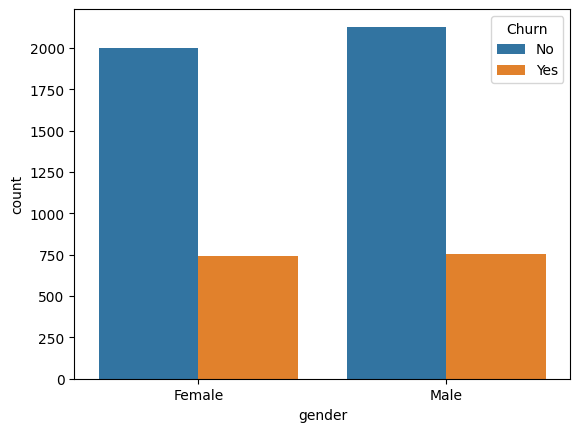

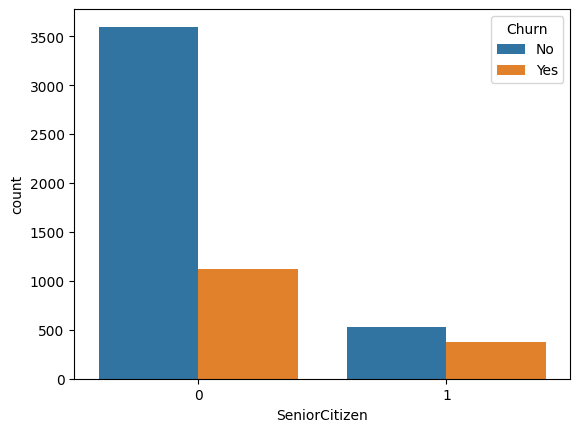

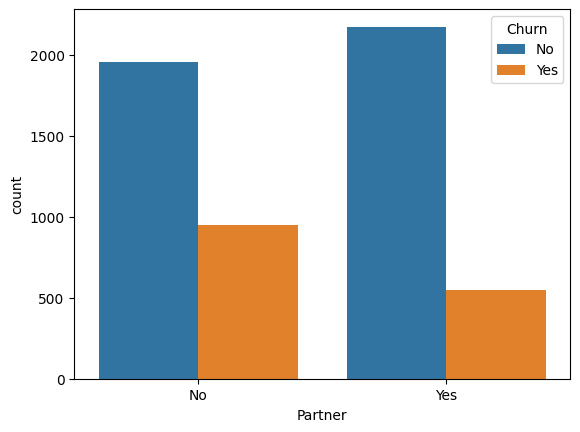

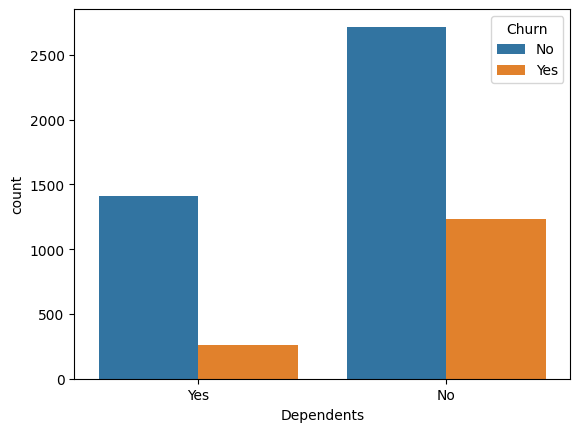

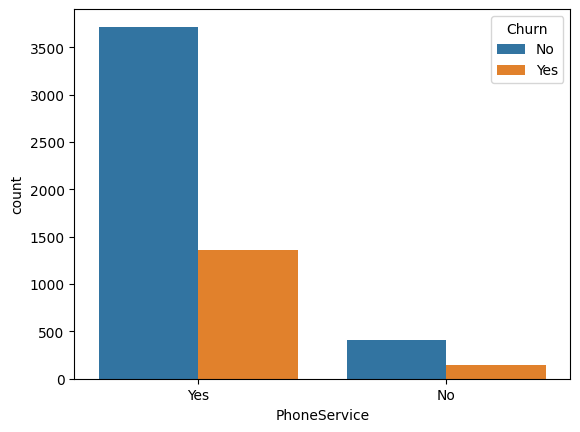

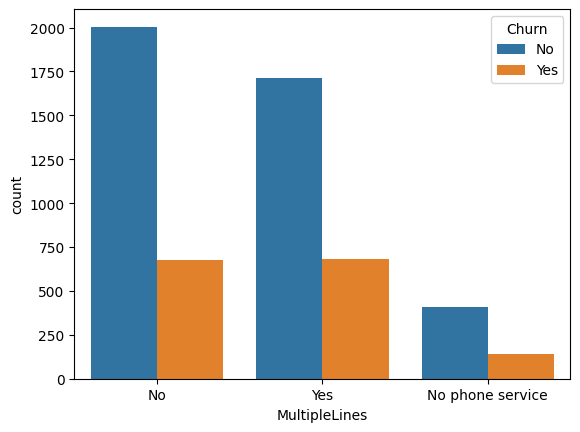

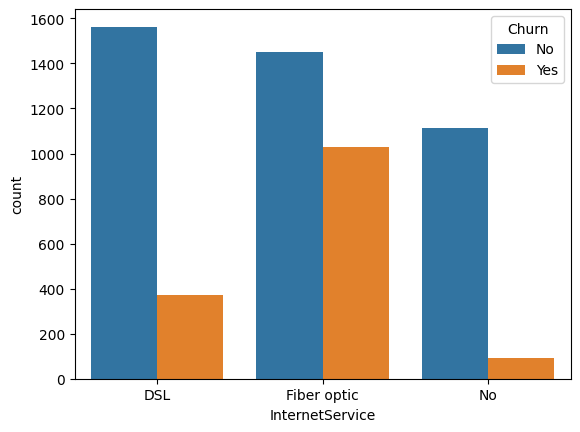

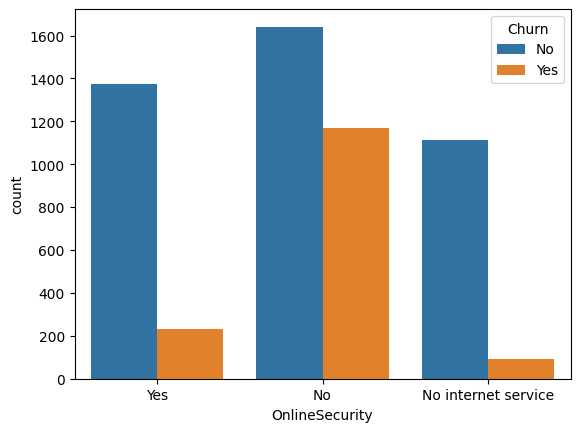

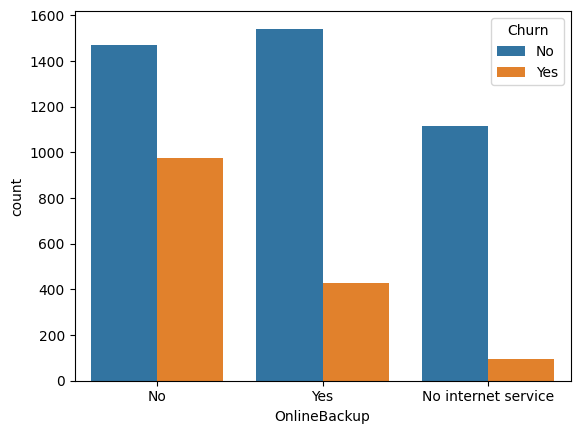

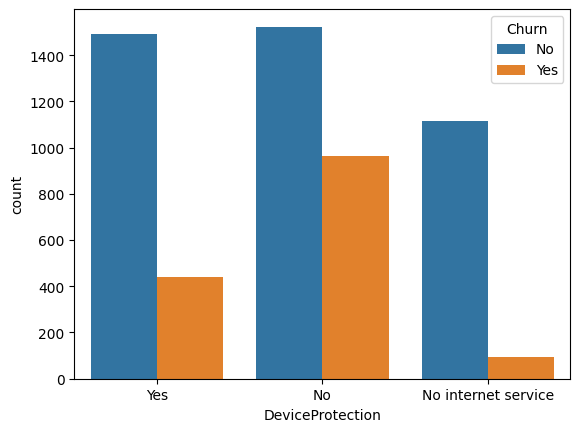

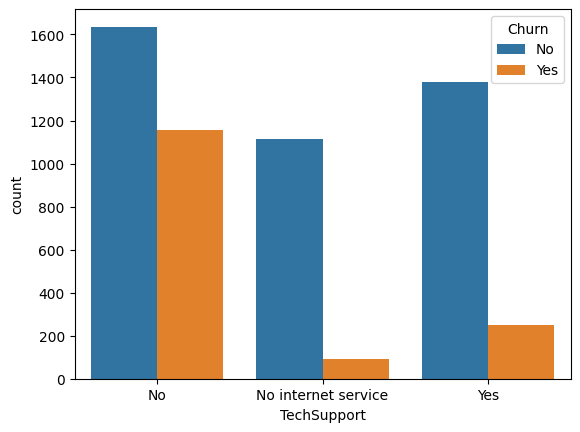

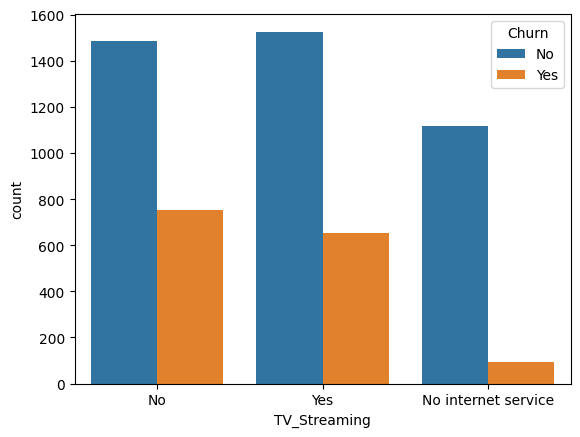

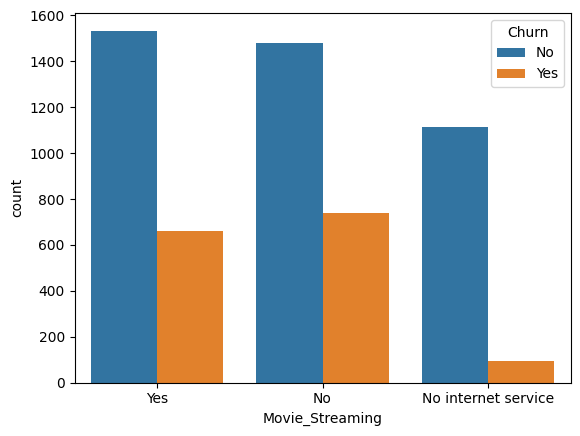

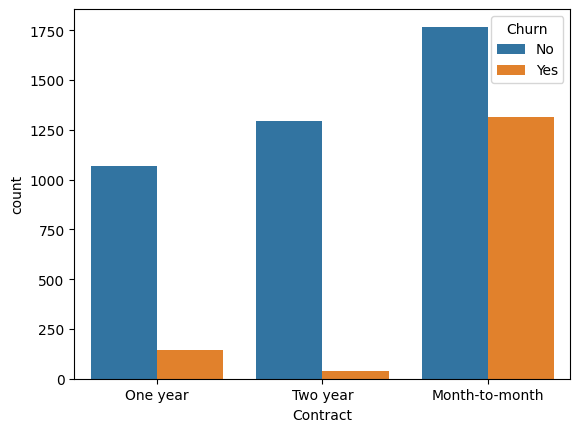

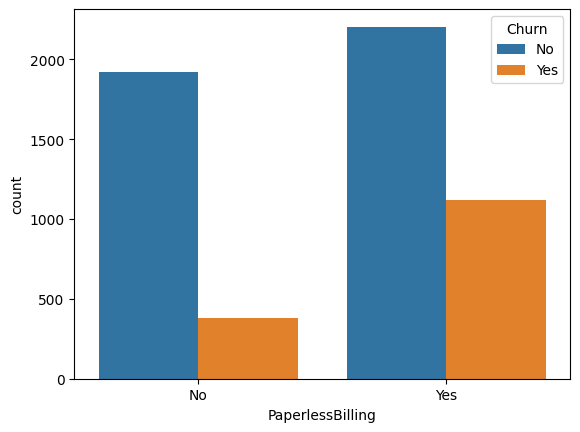

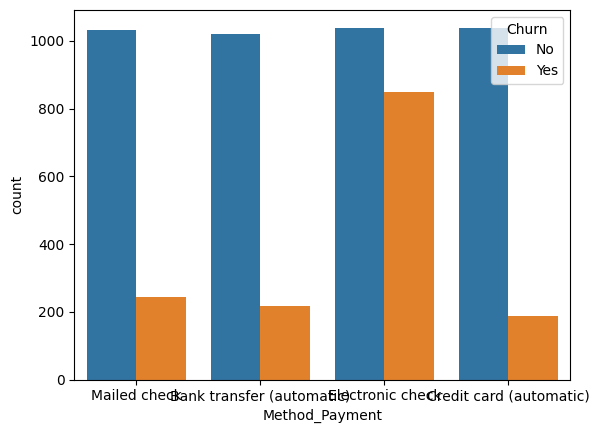

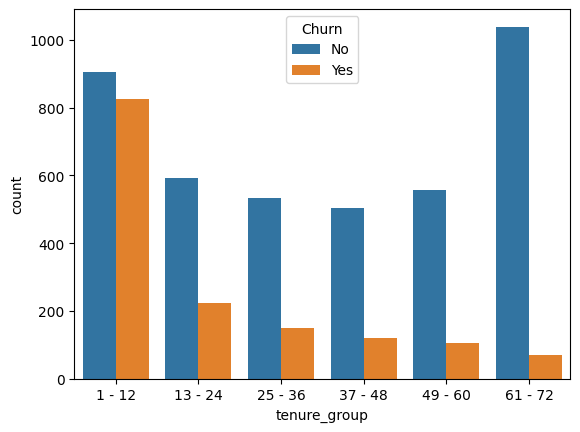

In [21]:
for i, predictor in enumerate(teleco_data.drop(columns=['Churn', 'TotalCharges', 'Charges_Month'])):
    plt.figure(i)
    sns.countplot(data=teleco_data, x=predictor, hue='Churn')

In [22]:
teleco_data['Churn'] = np.where(teleco_data.Churn == 'Yes',1,0)

In [23]:
teleco_data.head()

gender  SeniorCitizen Partner Dependents PhoneService     MultipleLines  \
0  Female              0      No        Yes          Yes                No   
1  Female              0      No         No          Yes               Yes   
2    Male              0     Yes         No           No  No phone service   
3    Male              0      No         No          Yes                No   
5    Male              0      No         No          Yes                No   

  InternetService OnlineSecurity OnlineBackup DeviceProtection TechSupport  \
0             DSL            Yes           No              Yes          No   
1     Fiber optic             No          Yes               No          No   
2             DSL             No           No               No          No   
3     Fiber optic             No           No               No          No   
5     Fiber optic             No           No               No          No   

  TV_Streaming Movie_Streaming        Contract PaperlessBilling  \
0           No             Yes        One year               No   
1          Yes             Yes        Two year              Yes   
2           No              No  Month-to-month              Yes   
3           No              No  Month-to-month              Yes   
5           No              No  Month-to-month              Yes   

              Method_Payment  Charges_Month  TotalCharges  Churn tenure_group  
0               Mailed check          64.85       1336.80      0      13 - 24  
1  Bank transfer (automatic)          97.20       5129.45      0      49 - 60  
2           Electronic check          23.45         23.45      1       1 - 12  
3           Electronic check          70.20        237.95      1       1 - 12  
5           Electronic check          69.55        521.35      0       1 - 12

In [24]:
teleco_data_dummies = pd.get_dummies(teleco_data)
teleco_data_dummies.head()

SeniorCitizen  Charges_Month  TotalCharges  Churn  gender_Female  \
0              0          64.85       1336.80      0           True   
1              0          97.20       5129.45      0           True   
2              0          23.45         23.45      1          False   
3              0          70.20        237.95      1          False   
5              0          69.55        521.35      0          False   

   gender_Male  Partner_No  Partner_Yes  Dependents_No  Dependents_Yes  ...  \
0        False        True        False          False            True  ...   
1        False        True        False           True           False  ...   
2         True       False         True           True           False  ...   
3         True        True        False           True           False  ...   
5         True        True        False           True           False  ...   

   Method_Payment_Bank transfer (automatic)  \
0                                     False   
1                                      True   
2                                     False   
3                                     False   
5                                     False   

   Method_Payment_Credit card (automatic)  Method_Payment_Electronic check  \
0                                   False                            False   
1                                   False                            False   
2                                   False                             True   
3                                   False                             True   
5                                   False                             True   

   Method_Payment_Mailed check  tenure_group_1 - 12  tenure_group_13 - 24  \
0                         True                False                  True   
1                        False                False                 False   
2                        False                 True                 False   
3                        False                 True                 False   
5                        False                 True                 False   

   tenure_group_25 - 36  tenure_group_37 - 48  tenure_group_49 - 60  \
0                 False                 False                 False   
1                 False                 False                  True   
2                 False                 False                 False   
3                 False                 False                 False   
5                 False                 False                 False   

   tenure_group_61 - 72  
0                 False  
1                 False  
2                 False  
3                 False  
5                 False  

[5 rows x 51 columns]

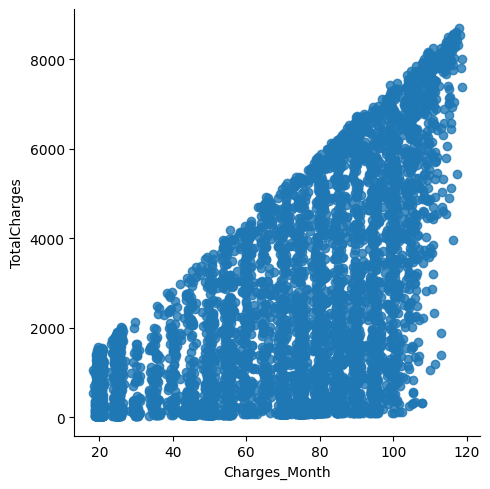

In [25]:
sns.lmplot(data=teleco_data_dummies, x='Charges_Month', y='TotalCharges', fit_reg=False) 
#Relationship between Monthly Charges and Total Charges

C:\Users\91860\AppData\Local\Temp\ipykernel_17164\3031820742.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Mth = sns.kdeplot(teleco_data_dummies.Charges_Month[(teleco_data_dummies["Churn"] == 0) ],
C:\Users\91860\AppData\Local\Temp\ipykernel_17164\3031820742.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Mth = sns.kdeplot(teleco_data_dummies.Charges_Month[(teleco_data_dummies["Churn"] == 1) ],


Text(0.5, 1.0, 'Monthly charges by churn')

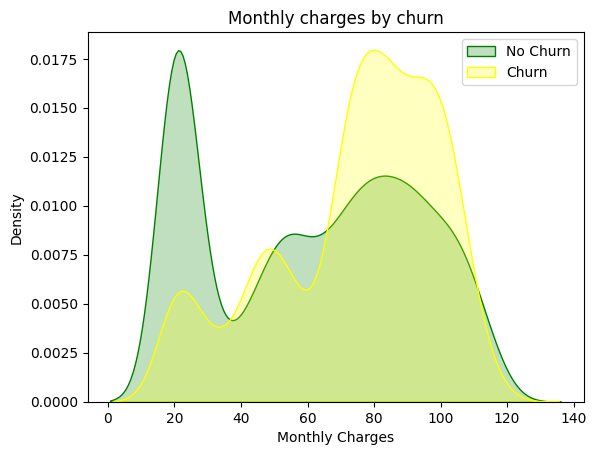

In [26]:
#Churn by Monthly Charges and Total Charges
Mth = sns.kdeplot(teleco_data_dummies.Charges_Month[(teleco_data_dummies["Churn"] == 0) ],
                color="Green", shade = True)
Mth = sns.kdeplot(teleco_data_dummies.Charges_Month[(teleco_data_dummies["Churn"] == 1) ],
                ax =Mth, color="Yellow", shade= True)
Mth.legend(["No Churn","Churn"],loc='upper right')
Mth.set_ylabel('Density')
Mth.set_xlabel('Monthly Charges')
Mth.set_title('Monthly charges by churn')

C:\Users\91860\AppData\Local\Temp\ipykernel_17164\2902808231.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Tot = sns.kdeplot(teleco_data_dummies.TotalCharges[(teleco_data_dummies["Churn"] == 0) ],
C:\Users\91860\AppData\Local\Temp\ipykernel_17164\2902808231.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Tot = sns.kdeplot(teleco_data_dummies.TotalCharges[(teleco_data_dummies["Churn"] == 1) ],


Text(0.5, 1.0, 'Total charges by churn')

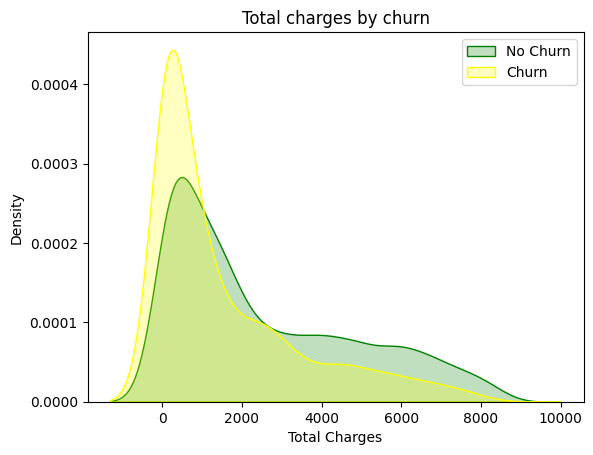

In [27]:
Tot = sns.kdeplot(teleco_data_dummies.TotalCharges[(teleco_data_dummies["Churn"] == 0) ],
                color="Green", shade = True)
Tot = sns.kdeplot(teleco_data_dummies.TotalCharges[(teleco_data_dummies["Churn"] == 1) ],
                ax =Tot, color="Yellow", shade= True)
Tot.legend(["No Churn","Churn"],loc='upper right')
Tot.set_ylabel('Density')
Tot.set_xlabel('Total Charges')
Tot.set_title('Total charges by churn')

<Axes: >

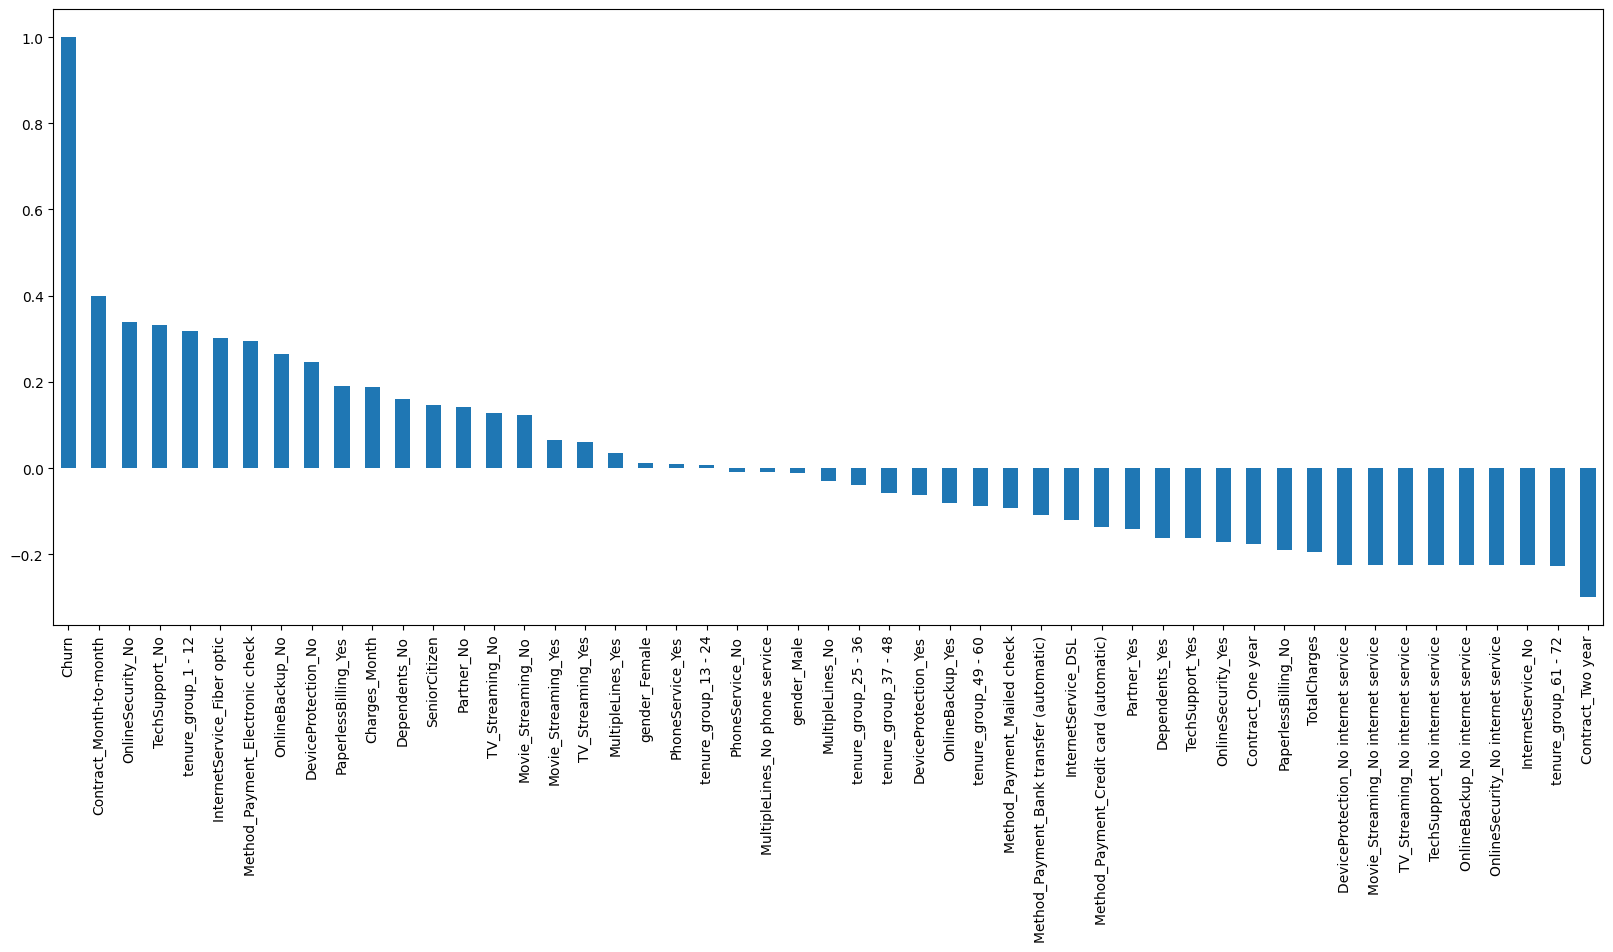

In [28]:
plt.figure(figsize=(20,8))
teleco_data_dummies.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')

<Axes: >

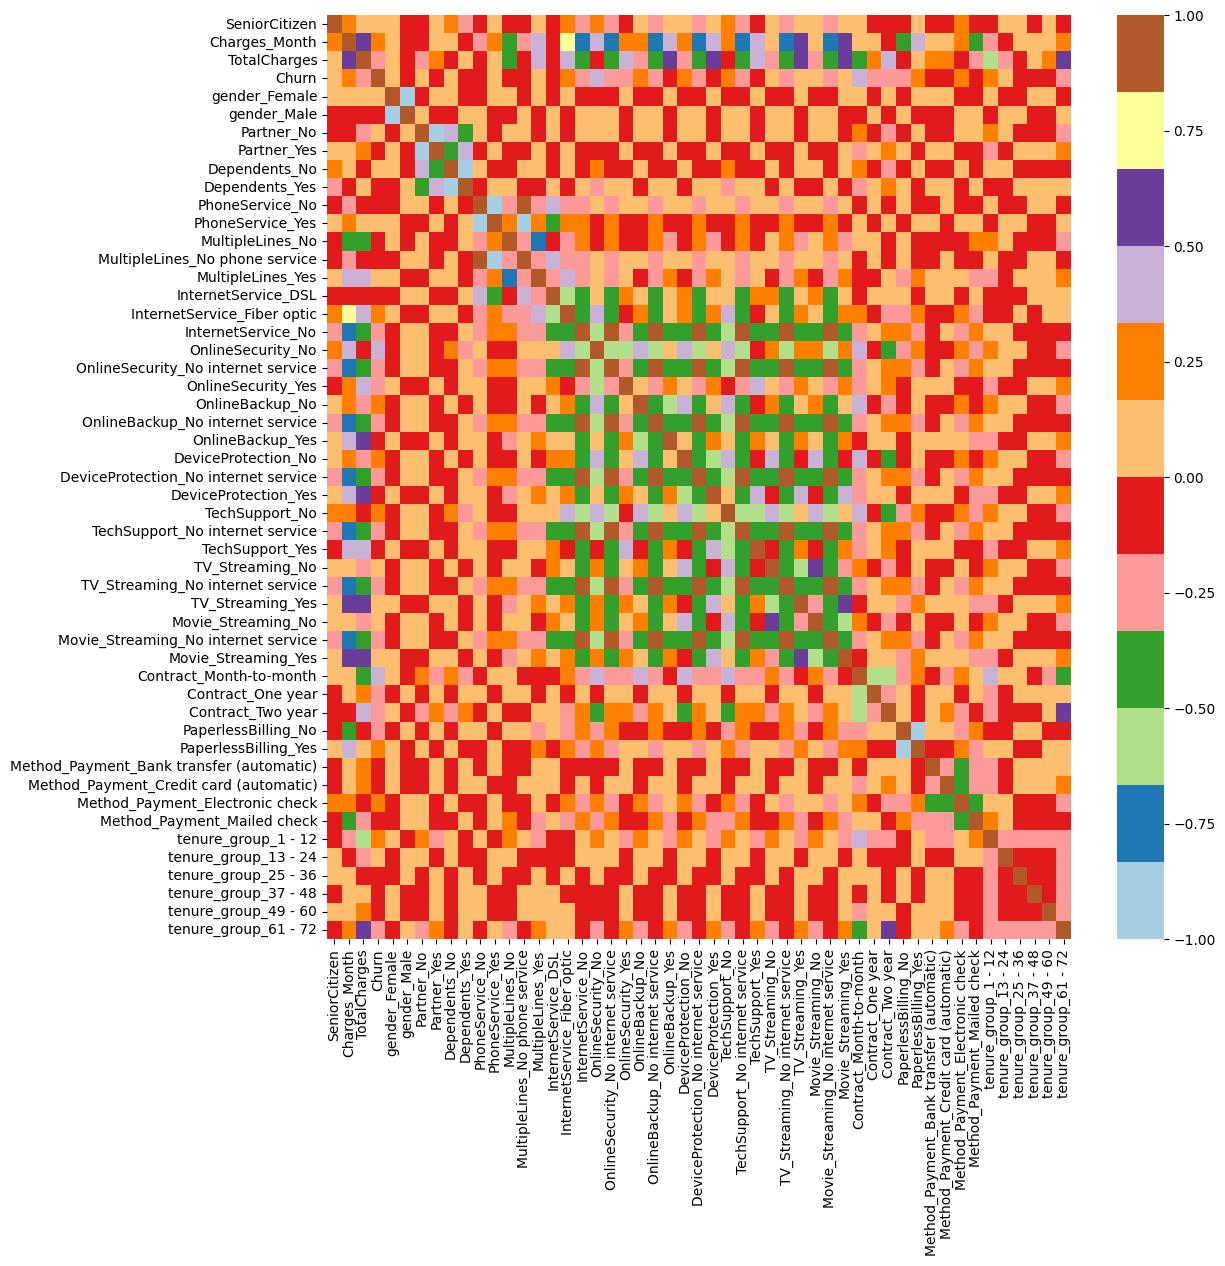

In [29]:
plt.figure(figsize=(12,12))
sns.heatmap(teleco_data_dummies.corr(), cmap="Paired")

In [30]:
new_df1_target0=teleco_data.loc[teleco_data["Churn"]==0]
new_df1_target1=teleco_data.loc[teleco_data["Churn"]==1]

In [31]:
def uniplot(df,col,title,hue =None):
    
    sns.set_style('whitegrid')
    sns.set_context('talk')
    plt.rcParams["axes.labelsize"] = 20
    plt.rcParams['axes.titlesize'] = 22
    plt.rcParams['axes.titlepad'] = 30
    
    
    temp = pd.Series(data = hue)
    fig, ax = plt.subplots()
    width = len(df[col].unique()) + 7 + 4*len(temp.unique())
    fig.set_size_inches(width , 8)
    plt.xticks(rotation=45)
    plt.yscale('log')
    plt.title(title)
    ax = sns.countplot(data = df, x= col, order=df[col].value_counts().index,hue = hue,palette='bright') 
        
    plt.show()

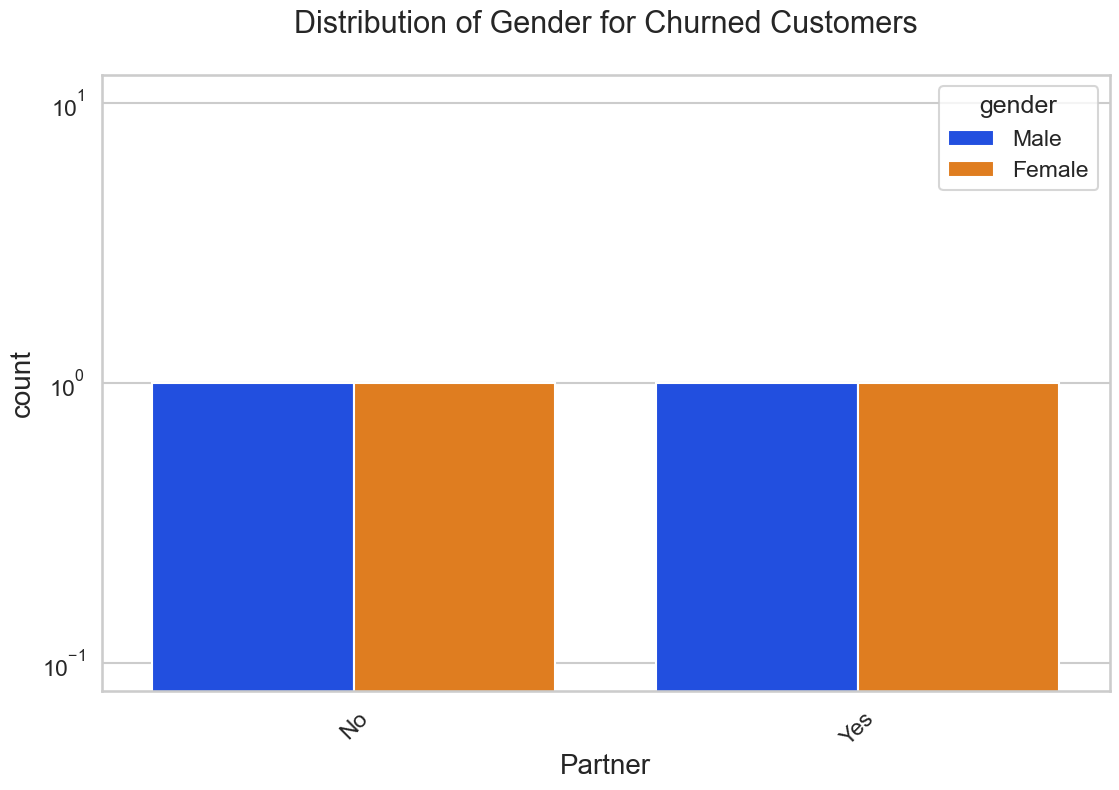

In [32]:
uniplot(new_df1_target1,col='Partner',title='Distribution of Gender for Churned Customers',hue='gender')

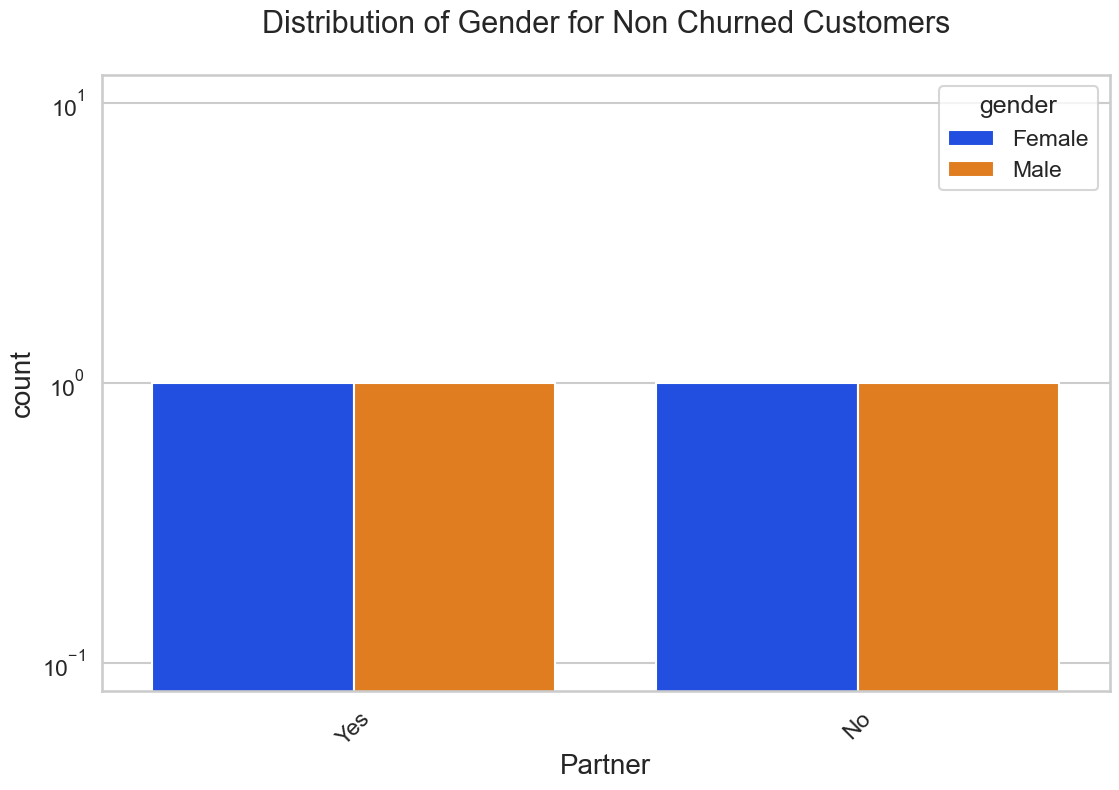

In [33]:
uniplot(new_df1_target0,col='Partner',title='Distribution of Gender for Non Churned Customers',hue='gender')

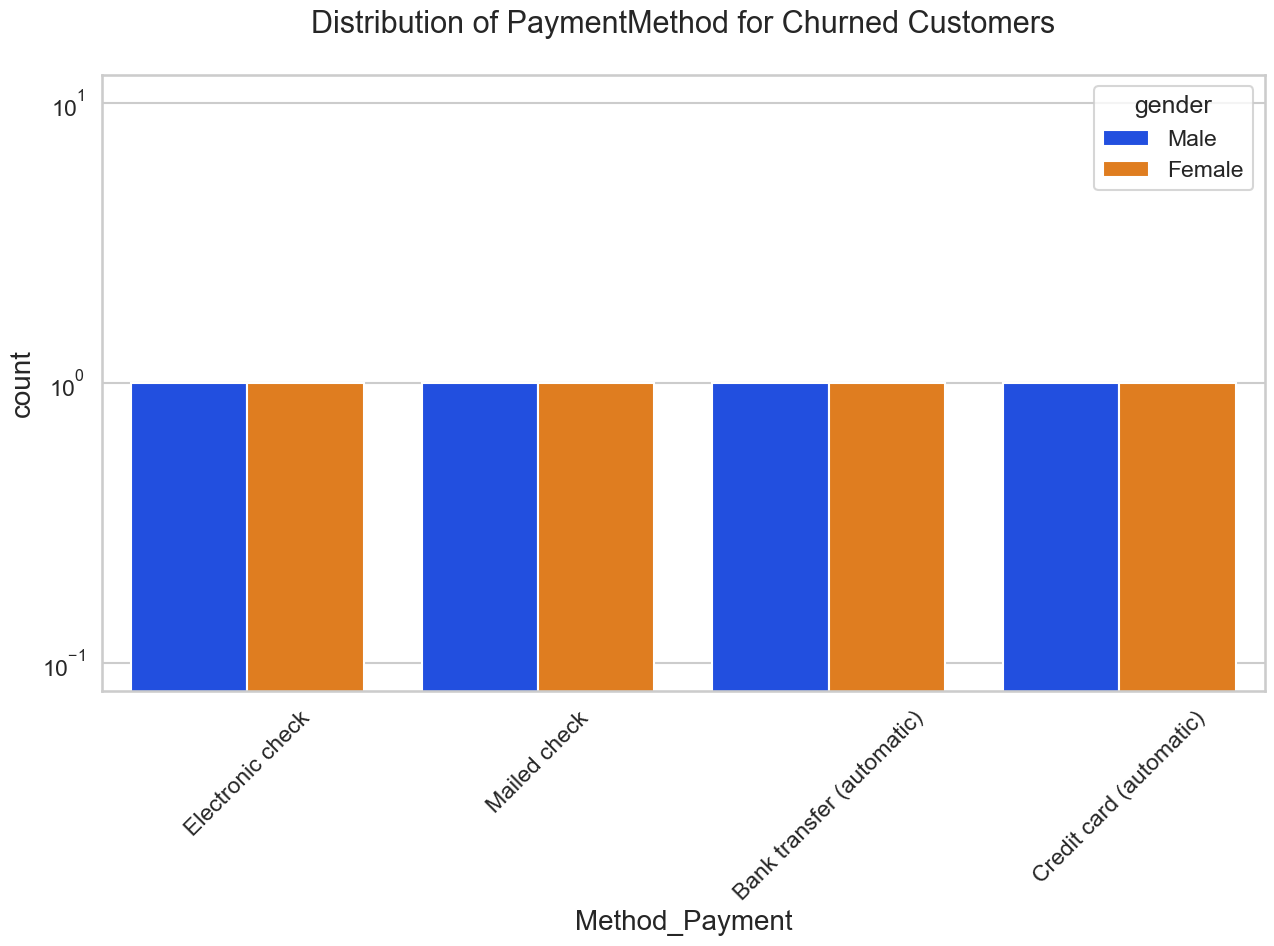

In [34]:
uniplot(new_df1_target1,col='Method_Payment',title='Distribution of PaymentMethod for Churned Customers',hue='gender')

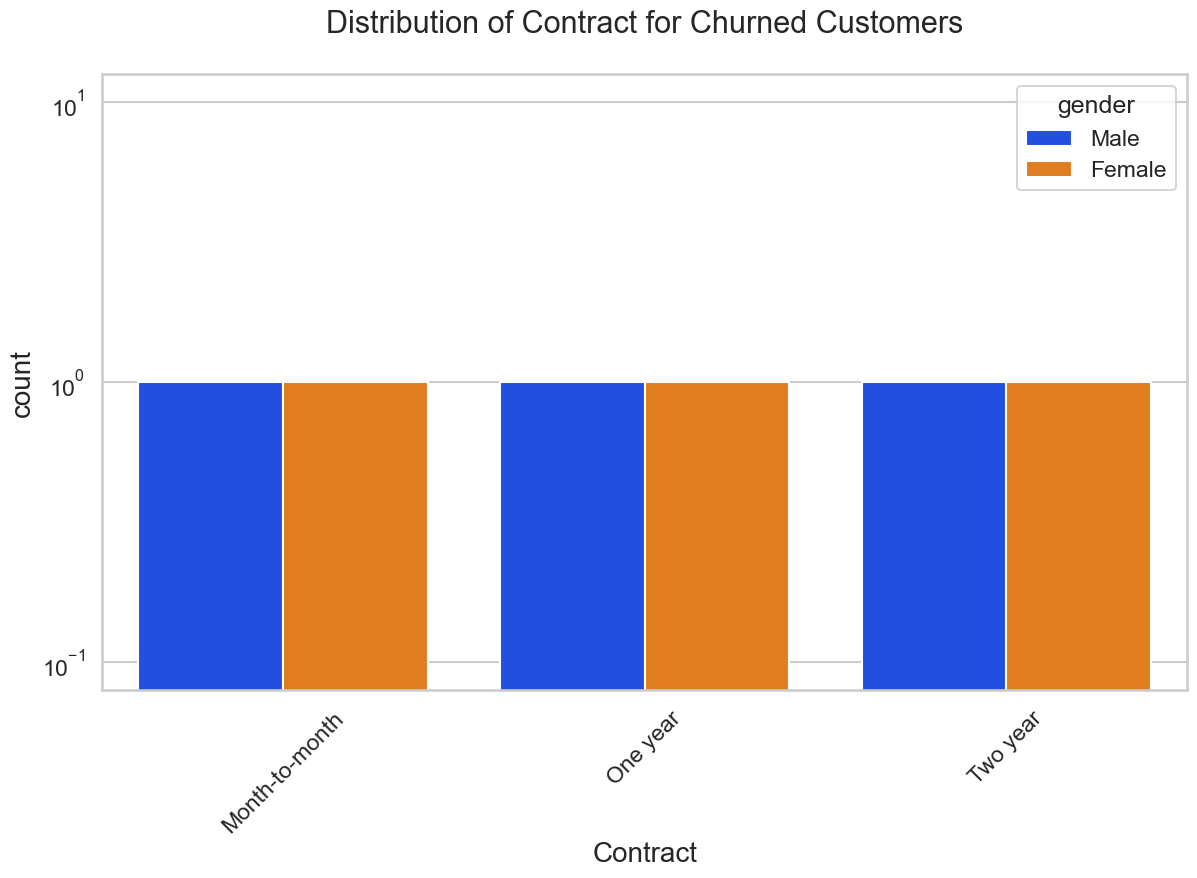

In [35]:
uniplot(new_df1_target1,col='Contract',title='Distribution of Contract for Churned Customers',hue='gender')

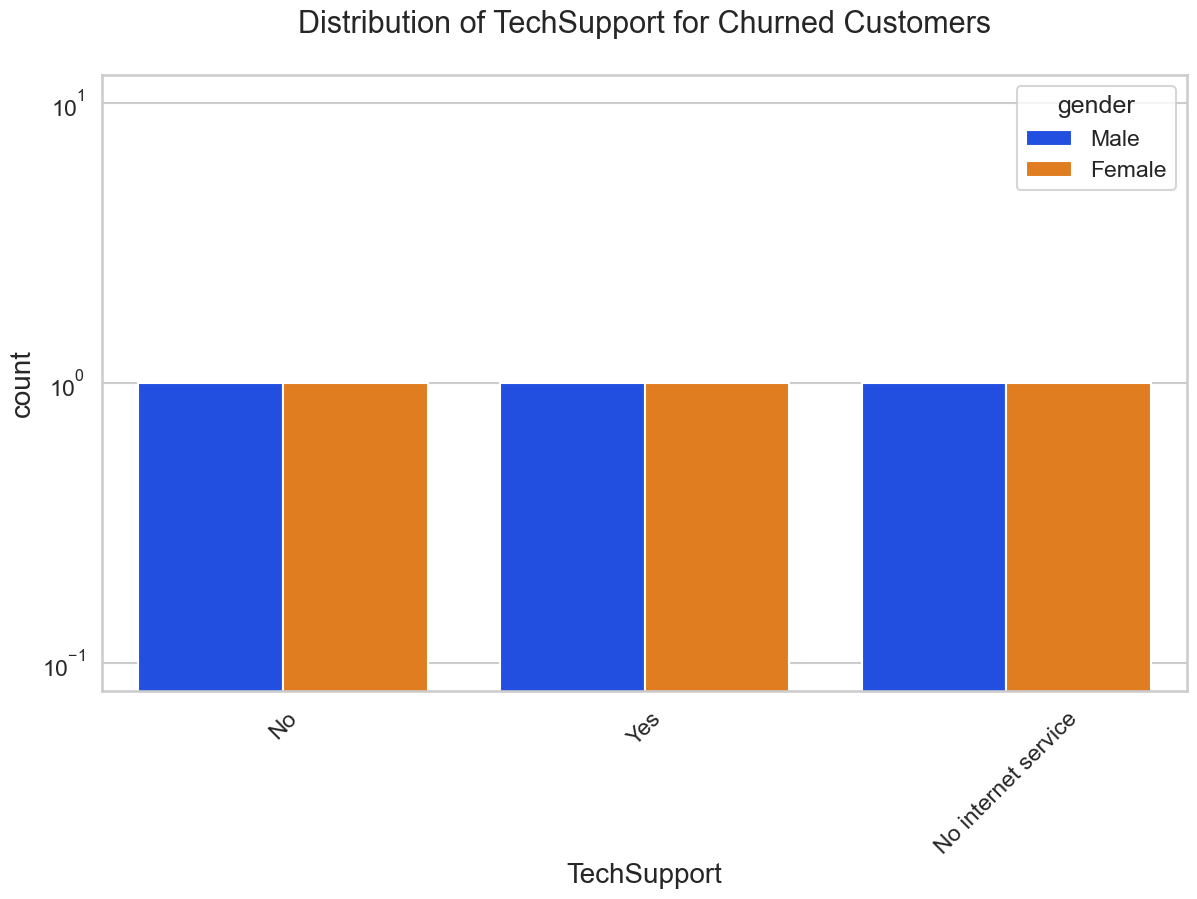

In [36]:
uniplot(new_df1_target1,col='TechSupport',title='Distribution of TechSupport for Churned Customers',hue='gender')

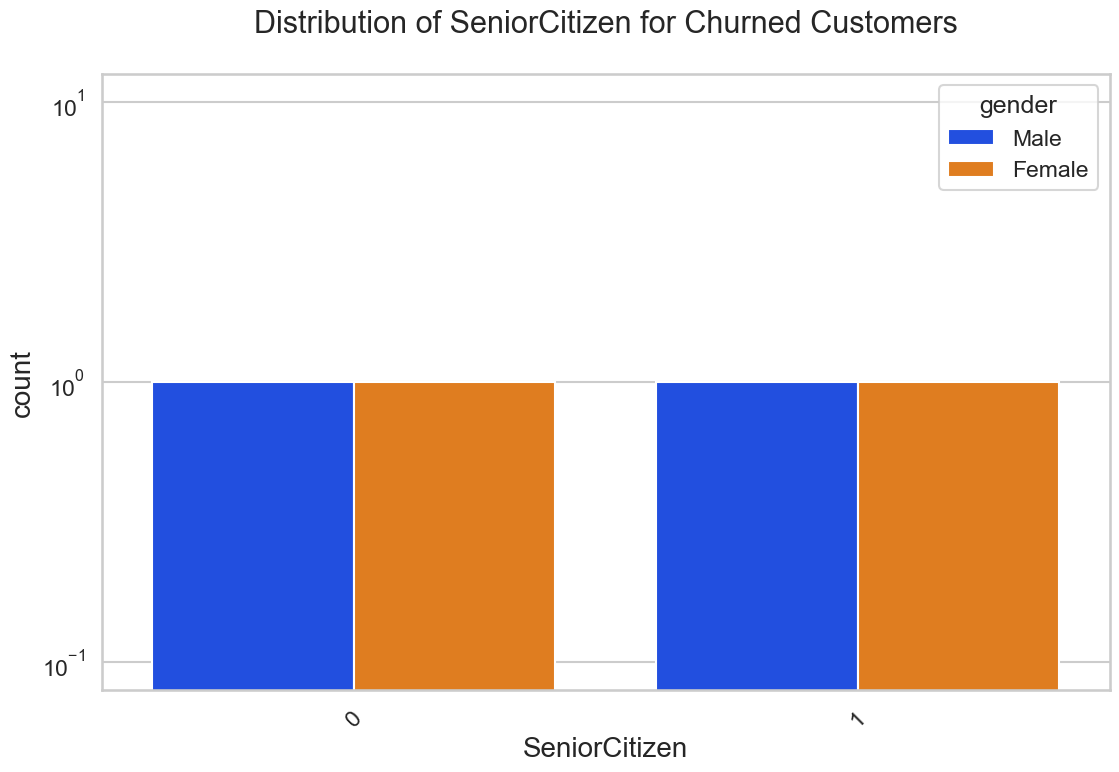

In [37]:
uniplot(new_df1_target1,col='SeniorCitizen',title='Distribution of SeniorCitizen for Churned Customers',hue='gender')

In [38]:
teleco_data_dummies.to_csv('tel_churn.csv')